In [1]:
#Import packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read the csv_file and get the raw data
data = pd.read_csv(r'File-Name.csv', sep=',')

#sletter dupletter i links
data.drop_duplicates(subset=['links'],inplace=True)
data

#forkorter adresse til postnr
data['post1']=data['rest_location'].astype(str).str[:-8].copy()
#Sletter forreste del så post nr
data['post2']=data['post1'].astype(str).str[-4:].copy()

data['post2']=pd.to_numeric(data['post2'], errors='ignore')

#dropper alt der ikke ligner post nr
data3=data.loc[(data['post2'] != 'havn') & (data['post2'] != '00 N') & (data['post2'] != '06 K') & (data['post2'] != 'vn V') & (data['post2'] != '')].copy()
data3.dropna(subset=['rest_cuisine'], inplace=True)


In [3]:
#we make a new dataframe
new = pd.DataFrame([data3.rest_name, data3.rest_rating, data3.post2, data3.links , data3.rest_cuisine]).transpose()

#make a DF with the duplicates
duplicateDFRow = new[new.duplicated()]
print(duplicateDFRow)

#removes duplicates and make a new dataframe
new2 = new.drop_duplicates()
#sort the new dataframe
new3 = new2.copy()
new3 = new3.sort_values('post2')
new3 = new3.reset_index(drop = True)
#new3.set_index('post2')

#we change 3 postal codes from 1001 to 1050 since 1001 is a postal box - (kilde:https://www.dst.dk/da/TilSalg/Forskningsservice/Dokumentation/hoejkvalitetsvariable/folketal/postnr)
new3.iloc[:3 , 2] = str(1050)

#make a new column with districts (KBH K and so on)
new3['area'] = new3['post2']

#change the type
new3['post2'] = new3['post2'].astype(float)

#add data to the new columns
new3['area'] = pd.cut(new3.post2, bins=[0, 1499, 1799, 1999, 2000, 2100, 2150, 2200, 2300, 2400, 2450, 2500, 2610, 2700, 2720, 2770, 2860, 2900], labels=['København K', 'København V','Frederiksberg C', 'Frederiksberg', 'København Ø', 'Nordhavn', 'København N', 'København S', 'København NV', 'København SV', 'Valby', 'Rødovre', 'Brønshøj', 'Vanløse', 'Kastrup', 'Søborg', 'Hellerup'])

#replace '' and remove them - because their postal code is outside of 2900 (e.g. 2930, 3500, 5000)
new3['area'].replace('', np.nan, inplace=True)
new3.dropna(subset=['area'], inplace=True)

Empty DataFrame
Columns: [rest_name, rest_rating, post2, links, rest_cuisine]
Index: []


In [5]:
#We calculate the sum and the amount of restaurant per district

try:
    sum_kbhK = new3[new3['area'] == 'København K'].rest_rating.sum()
    len_kbhK = len(new3[new3['area'] == 'København K'].rest_rating)
    avg_rating_kbhK = sum_kbhK/len_kbhK
except:
    avg_rating_kbhK = np.nan

try:
    sum_kbhV = new3[new3['area'] == 'København V'].rest_rating.sum()
    len_kbhV = len(new3[new3['area'] == 'København V'].rest_rating)
    avg_rating_kbhV = sum_kbhV/len_kbhV
except:
    avg_rating_kbhV = np.nan

try:
    sum_F= new3[new3['area'] == 'Frederiksberg'].rest_rating.sum()
    len_F = len(new3[new3['area'] == 'Frederiksberg'].rest_rating)
    avg_rating_F = sum_F/len_F
except:
    avg_rating_F = np.nan

try:
    sum_Fc= new3[new3['area'] == 'Frederiksberg C'].rest_rating.sum()
    len_Fc = len(new3[new3['area'] == 'Frederiksberg C'].rest_rating)
    avg_rating_Fc = sum_Fc/len_Fc
except:
    avg_rating_F = np.nan

try:
    sum_kbhOE = new3[new3['area'] == 'København Ø'].rest_rating.sum()
    len_kbhOE = len(new3[new3['area'] == 'København Ø'].rest_rating)
    avg_rating_kbhOE = sum_kbhOE/len_kbhOE
except:
    avg_rating_kbhOE = np.nan

try:
    sum_N = new3[new3['area'] == 'Nordhavn'].rest_rating.sum()
    len_N = len(new3[new3['area'] == 'Nordhavn'].rest_rating)
    avg_rating_N = sum_N/len_N
except:
    avg_rating_N = np.nan

try:
    sum_kbhN = new3[new3['area'] == 'København N'].rest_rating.sum()
    len_kbhN = len(new3[new3['area'] == 'København N'].rest_rating)
    avg_rating_kbhN = sum_kbhN/len_kbhN
except:
    avg_rating_kbhN = np.nan

try:
    sum_kbhS = new3[new3['area'] == 'København S'].rest_rating.sum()
    len_kbhS = len(new3[new3['area'] == 'København S'].rest_rating)
    avg_rating_kbhS = sum_kbhS/len_kbhS
except:
    avg_rating_kbhS = np.nan

try:
    sum_kbhNV = new3[new3['area'] == 'København NV'].rest_rating.sum()
    len_kbhNV = len(new3[new3['area'] == 'København NV'].rest_rating)
    avg_rating_kbhNV = sum_kbhNV/len_kbhNV
except:
    avg_rating_kbhNV = np.nan

try:
    sum_kbhSV = new3[new3['area'] == 'København SV'].rest_rating.sum()
    len_kbhSV = len(new3[new3['area'] == 'København SV'].rest_rating)
    avg_rating_kbhSV = sum_kbhSV/len_kbhSV
except:
    avg_rating_kbhSV = np.nan

try:
    sum_V = new3[new3['area'] == 'Valby'].rest_rating.sum()
    len_V = len(new3[new3['area'] == 'Valby'].rest_rating)
    avg_rating_V = sum_V/len_V
except:
    avg_rating_V = np.nan

try:
    sum_R = new3[new3['area'] == 'Rødovre'].rest_rating.sum()
    len_R = len(new3[new3['area'] == 'Rødovre'].rest_rating)
    avg_rating_R = sum_R/len_R
except:
    avg_rating_R = np.nan

try:
    sum_B = new3[new3['area'] == 'Brønshøj'].rest_rating.sum()
    len_B = len(new3[new3['area'] == 'Brønshøj'].rest_rating)
    avg_rating_B = sum_B/len_B
except:
    avg_rating_B = np.nan

try:
    sum_VL = new3[new3['area'] == 'Vanløse'].rest_rating.sum()
    len_VL = len(new3[new3['area'] == 'Vanløse'].rest_rating)
    avg_rating_VL = sum_VL/len_VL
except:
    avg_rating_VL = np.nan

try:
    sum_K = new3[new3['area'] == 'Kastrup'].rest_rating.sum()
    len_K = len(new3[new3['area'] == 'Kastrup'].rest_rating)
    avg_rating_K = sum_K/len_K
except:
    avg_rating_K = np.nan

try:
    sum_S = new3[new3['area'] == 'Søborg'].rest_rating.sum()
    len_S = len(new3[new3['area'] == 'Søborg'].rest_rating)
    avg_rating_S = sum_S/len_S
except:
    avg_rating_S = np.nan

try:
    sum_H = new3[new3['area'] == 'Hellerup'].rest_rating.sum()
    len_H = len(new3[new3['area'] == 'Hellerup'].rest_rating)
    avg_rating_H = sum_H/len_H
except:
    avg_rating_H = np.nan

avg_rate = [avg_rating_kbhK] + [avg_rating_kbhV] + [avg_rating_F] + [avg_rating_Fc] + [avg_rating_kbhOE] + [avg_rating_N] + [avg_rating_kbhN] + [avg_rating_kbhS] + [avg_rating_kbhNV] + [avg_rating_kbhSV] + [avg_rating_V] + [avg_rating_R] + [avg_rating_B] + [avg_rating_VL] + [avg_rating_K] + [avg_rating_S] + [avg_rating_H]

In [6]:
avg_rate = [x for x in avg_rate if str(x) != 'nan']

print(avg_rate)

#I have deleted 'Rødovre' from the following two lists since it is = NAN (no restaurants)
bydele = ['København K', 'København V','Frederiksberg C', 'Frederiksberg', 'København Ø', 'Nordhavn', 'København N', 'København S', 'København NV', 'København SV', 'Valby', 'Brønshøj', 'Vanløse', 'Kastrup', 'Søborg', 'Hellerup']

antal_rest = [len_kbhK] + [len_kbhV] + [len_F] + [len_Fc] + [len_kbhOE] + [len_N] + [len_kbhN] + [len_kbhS] + [len_kbhNV] + [len_kbhSV] + [len_V] + [len_B] + [len_VL] + [len_K] + [len_S] + [len_H]

print(bydele, antal_rest)

a_rating = pd.DataFrame(avg_rate)

a_rating = pd.DataFrame(list(zip(bydele, avg_rate, antal_rest)), 
               columns =['Bydele', 'avg_rate', 'antal_rest'])

a_rating2 = a_rating.copy()
a_rating2.set_index('avg_rate')
a_rating2 = a_rating2.sort_values('antal_rest', ascending = False)
a_rating2 = a_rating2.reset_index(drop = True)

[4.191648822269808, 4.096456692913386, 4.131147540983607, 4.130434782608695, 4.171875, 4.333333333333333, 4.224409448818897, 4.128205128205129, 4.25, 4.285714285714286, 4.357142857142857, 5.0, 4.166666666666667, 4.0, 3.9285714285714284, 4.1]
['København K', 'København V', 'Frederiksberg C', 'Frederiksberg', 'København Ø', 'Nordhavn', 'København N', 'København S', 'København NV', 'København SV', 'Valby', 'Brønshøj', 'Vanløse', 'Kastrup', 'Søborg', 'Hellerup'] [467, 254, 61, 46, 64, 6, 127, 78, 10, 7, 7, 2, 9, 3, 7, 5]


In [6]:
#avg_rate2 = np.around(avg_rate, decimals=3)

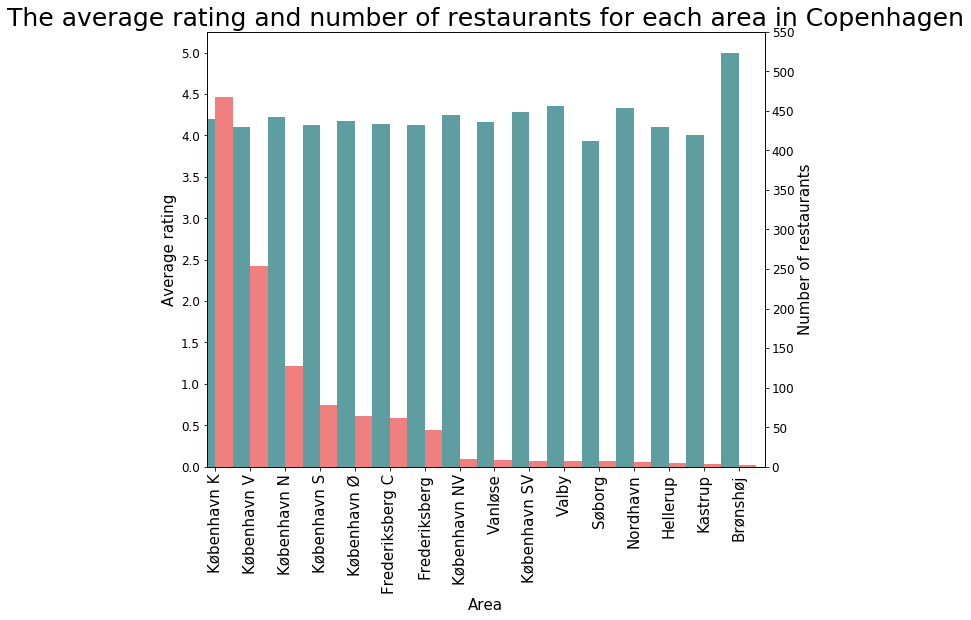

In [7]:
#print(avg_rate2)

import matplotlib.pyplot as plt

#plt.bar(bydele, avg_rate)
#plt.xticks(rotation=70)


#ax = a_rating.plot.bar(x='Bydele', y='avg_rate', rot=90)

#a_rating = a_rating.sort_values('avg_rate')
fig = plt.figure(figsize=(10 , 8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

a_rating2.avg_rate.plot(kind='bar', color='cadetblue', ax=ax, width=0.5, position=1)
a_rating2.antal_rest.plot(kind='bar', color='lightcoral', ax=ax2, width=0.5, position=0)
ax.set_xticklabels(a_rating2['Bydele'], fontsize = 15)
ax.set_ylabel('Average rating', fontsize=15)
ax2.set_ylabel('Number of restaurants', fontsize=15)
ax.set_xlabel('Area', fontsize=15)
ax.set_title('The average rating and number of restaurants for each area in Copenhagen', fontsize=25)
#ax.set_yticklabels([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
#plt.xticks(np.arange(min(avg_rate), max(avg_rate)+1, 1.0))
ax.set_yticks(np.arange(0, 5.5, step=0.5))
ax2.set_yticks(np.arange(0, 600, step=50))
ax.set_yticklabels(np.arange(0, 8, step=0.5), rotation=0, fontsize=12)
ax2.set_yticklabels(np.arange(0, 600, step=50), rotation=0, fontsize=12)
ax.margins(x=0)
#for p in ax2.patches:
   # ax2.text(p.get_x() + p.get_width()/2., p.get_height()/1.15, '%d' % int(p.get_height()), 
      #      fontsize=10, ha='center', va='bottom' , color = 'black')
#plt.xlim([0,15])
plt.show()
fig.savefig('avgrate.PNG')
fig.savefig("image2.png",bbox_inches='tight',dpi=100)

No handles with labels found to put in legend.


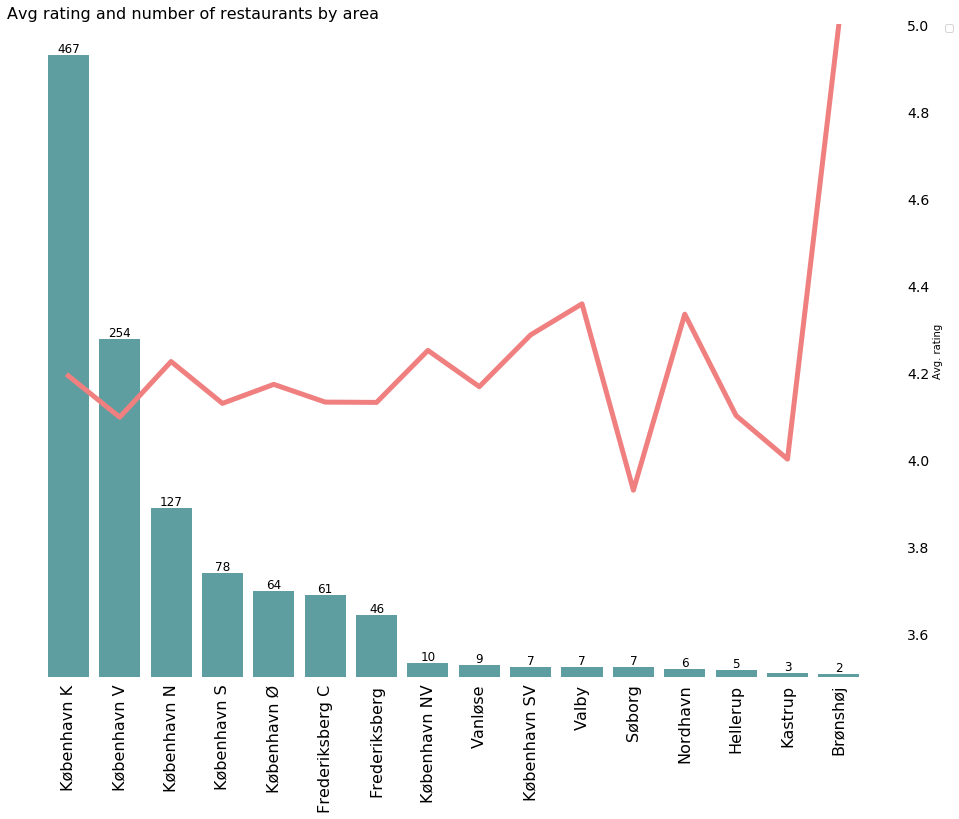

In [26]:
import seaborn as sns

fig , ax = plt.subplots(1 , figsize = (16, 12))


#Bar chart
ax = sns.barplot(x = 'Bydele' , y = 'antal_rest' , data = a_rating2 , color = 'cadetblue' , saturation = 1 , ax = ax , ci = None)
ax.set_title('Avg rating and number of restaurants by area' , loc = 'left' , fontsize = 16)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #Location of legend
ax.set_xticklabels(a_rating2['Bydele'], fontsize = 16)

ax.tick_params(axis = 'both' , which = 'both' , bottom = False , top = False , left = False , right = False , rotation = 90) #Removes ticks

ax.yaxis.set_label_text("#Restaurants") #Removes axis name
ax.xaxis.set_label_text("") #Removes axis name
#ax.set_ylim(0, 6)

ax.get_yaxis().set_visible(False)


#Data labels
for p in ax.patches:
    ax.text((p.get_x()) + p.get_width()/2., p.get_height(), int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

#Adding secondary axis
ax2 = ax.twinx()
ax2 = sns.lineplot(x = 'Bydele' , y = 'avg_rate' , data = a_rating2, color = 'lightcoral' , linewidth = 5, ax = ax2 , ci = None , sort = False)
ax2.set_xticklabels(a_rating2['Bydele'] , fontsize = 16)

ax2.set_ylim(3.5, 5)
ax2.tick_params(axis = 'both' , which = 'both' , bottom = False , top = False , left = False , right = False , labelsize = 14) #Removes ticks
ax2.yaxis.set_label_text("Avg. rating") #Removes axis name

#ax2.get_yaxis().set_visible(False)

sns.despine(left = True , bottom = True , right = True) #Removes border

plt.savefig('avg_rate_number.png')